In [1]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
fpath = "data/isoflops_curves.json"


In [3]:
with open(fpath, "r") as file:
    dataset_raw = json.loads(file.read())

In [4]:
compute_budgets = sorted(set([data['compute_budget'] for data in dataset_raw]))

In [5]:
compute_budgets

[6e+18, 1e+19, 3e+19, 6e+19, 1e+20, 3e+20, 6e+20, 1e+21, 3e+21]

In [6]:
dataset = defaultdict(list)

In [7]:
for data in dataset_raw:
    compute_budget = data['compute_budget']
    dataset[compute_budget].append((data["parameters"], data["final_loss"]))

In [8]:
min_indices = []
for compute_budget in compute_budgets:
    loss = [item[1] for item in dataset[compute_budget]]
    min_indices.append(np.argmin(loss))

762093419 5.899930270214304
806647749 5.617943423092358
1536852354 5.107176953205009
1952041776 4.830586005050577
3253402960 4.6528929644335255
5903836027 4.311218819265305
6971055968 4.121240846441071
6859328563 4.002834749948777
12148905329 3.773187514504335


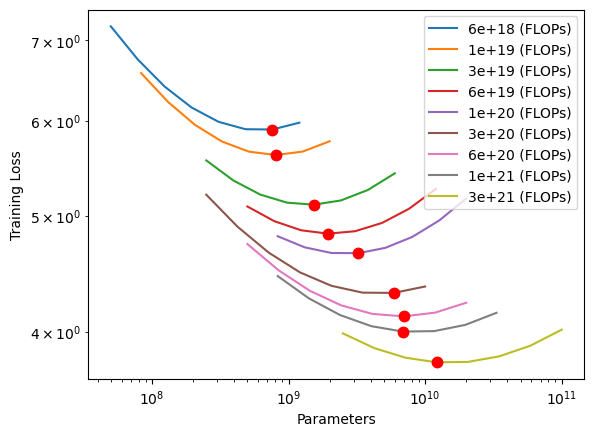

In [9]:
plt.figure()
for i, compute_budget in enumerate(compute_budgets):
    parameters = [item[0] for item in dataset[compute_budget]]
    losses = [item[1] for item in dataset[compute_budget]]
    min_idx = min_indices[i]
    
    plt.plot(parameters, losses, label=f"{compute_budget} (FLOPs)")
    print(parameters[min_idx], losses[min_idx])
    plt.plot(parameters[min_idx], losses[min_idx], marker=".", markersize=15, color="r")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("Parameters")
    plt.ylabel("Training Loss")

plt.legend()

In [10]:
min_indices = [np.argmin([item[1] for item in dataset[compute_budget]]) for compute_budget in compute_budgets]

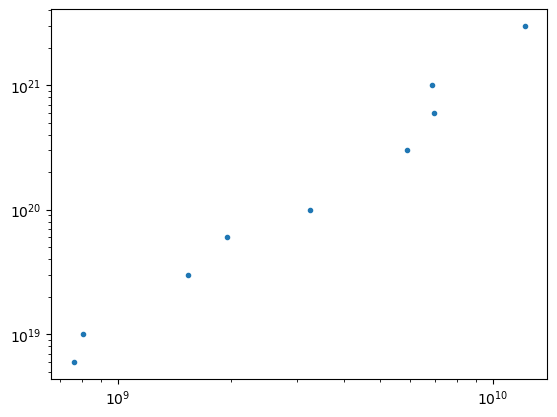

In [11]:
xdata = [dataset[budget][min_idx][0] for min_idx, budget in zip(min_indices, compute_budgets)]
ydata = compute_budgets
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.plot(xdata, ydata, marker='.', linestyle='')

In [12]:
xdata = [dataset[budget][min_idx][0] for min_idx, budget in zip(min_indices, compute_budgets)]
ydata = compute_budgets
log_xdata, log_ydata = np.log10(xdata), np.log10(ydata)
print(xdata, ydata)
def f(x, m, b):
    return m*x+b
# def f(x, k, n):
#     return k*x**n
m, b = curve_fit(f, log_xdata, log_ydata)[0]
k, n = 10**b, m
print(m, b, k, n)

[762093419, 806647749, 1536852354, 1952041776, 3253402960, 5903836027, 6971055968, 6859328563, 12148905329] [6e+18, 1e+19, 3e+19, 6e+19, 1e+20, 3e+20, 6e+20, 1e+21, 3e+21]
2.088202233969043 0.29046434175201774 1.9519304619679532 2.088202233969043


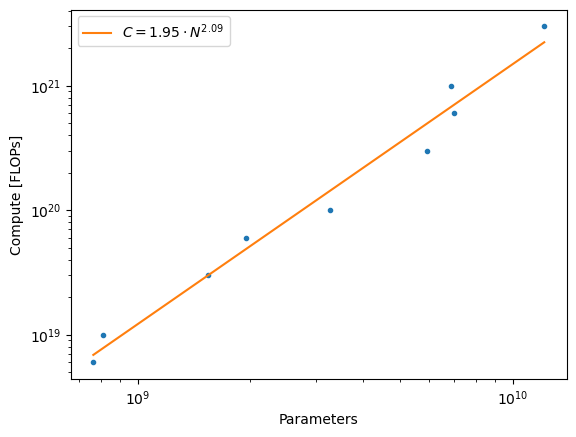

In [13]:
plt.figure()
plt.plot(xdata, ydata, marker='.', linestyle='')
xs = np.linspace(xdata[0], xdata[-1], 1000)
ys = k*xs**n

plt.plot(xs, ys, label=fr"$C = {k:.2f} \cdot N^{{{n:.2f}}}$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Parameters")
plt.ylabel("Compute [FLOPs]")
plt.legend()

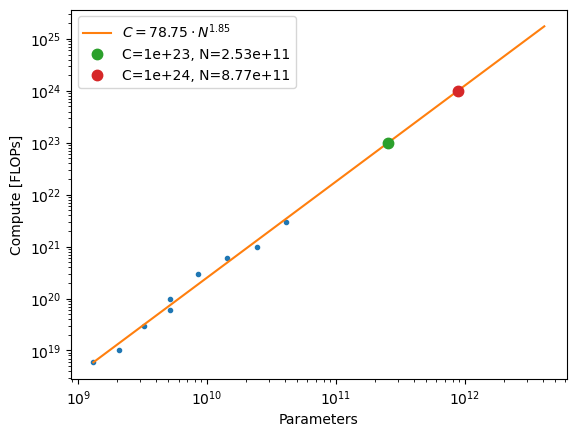

In [24]:
plt.figure()
plt.plot(xdata, ydata, marker='.', linestyle='')
xs = np.linspace(log_xdata[0], log_xdata[-1]+2, 100)
# ys = k*xs**n
ys = m*xs+b

plt.plot(10**xs, 10**ys, label=fr"$C = {k:.2f} \cdot N^{{{n:.2f}}}$")


#what we want to solve for
Cs = np.array([1e23, 1e24])
Ns = (1/k)**(1/n)*Cs**(1/n)

for C in Cs:
    N = (1/k)**(1/n)*C**(1/n)
    plt.plot(N, C, linestyle='', marker='.', markersize=15, label=f"C={C}, N={N:.2e}")


plt.xscale('log')
plt.yscale('log')
plt.xlabel("Parameters")
plt.ylabel("Compute [FLOPs]")
plt.legend()

defaultdict(list,
            {6e+18: [(49999999, 7.192784500319437),
              (78730505, 6.750171320661809),
              (123969849, 6.406639752150447),
              (195204177, 6.154368665155925),
              (307370470, 5.987783393573661),
              (483988649, 5.903434642394701),
              (762093419, 5.899930270214304),
              (1200000000, 5.977918696411691)],
             1e+19: [(83333333, 6.575071254529126),
              (131217508, 6.220815025174462),
              (206616415, 5.9530019364135125),
              (325340296, 5.765618650051031),
              (512284118, 5.654639707131759),
              (806647749, 5.617943423092358),
              (1270155698, 5.655275367192594),
              (2000000000, 5.768258932728475)],
             3e+19: [(249999999, 5.559968737386354),
              (393652526, 5.350911535688679),
              (619849246, 5.207528382521117),
              (976020888, 5.126776725320434),
              (1536852354, 5.107176953

In [19]:
xdata = [dataset[budget][min_idx][0] for min_idx, budget in zip(min_indices, compute_budgets)]
ydata = compute_budgets
xdata = [C/(6*N) for N, C in zip(xdata, ydata)]
log_xdata, log_ydata = np.log10(xdata), np.log10(ydata)
print(xdata, ydata)
def f(x, m, b):
    return m*x+b
# def f(x, k, n):
#     return k*x**n
m, b = curve_fit(f, log_xdata, log_ydata)[0]
k, n = 10**b, m
print(m, b, k, n)

[1312175089.1277542, 2066164157.4439783, 3253402961.5703735, 5122841182.472726, 5122841182.472726, 8469069901.558091, 14345028996.903902, 24297810658.27429, 41155971378.46459] [6e+18, 1e+19, 3e+19, 6e+19, 1e+20, 3e+20, 6e+20, 1e+21, 3e+21]
1.8507781676454473 1.8962489473548716 78.7497071355344 1.8507781676454473


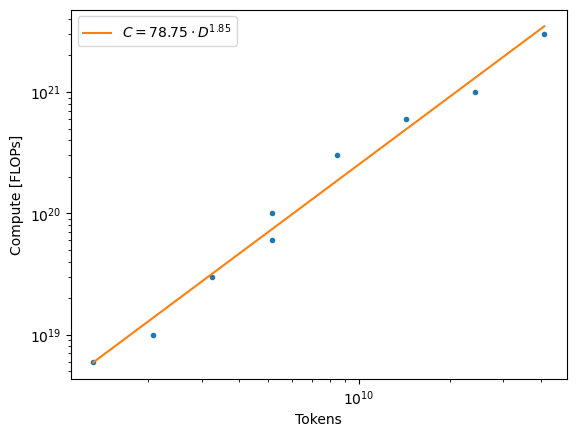

In [20]:
plt.figure()
plt.plot(xdata, ydata, marker='.', linestyle='')
xs = np.linspace(xdata[0], xdata[-1], 1000)
ys = k*xs**n

plt.plot(xs, ys, label=fr"$C = {k:.2f} \cdot D^{{{n:.2f}}}$")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Tokens")
plt.ylabel("Compute [FLOPs]")
plt.legend()

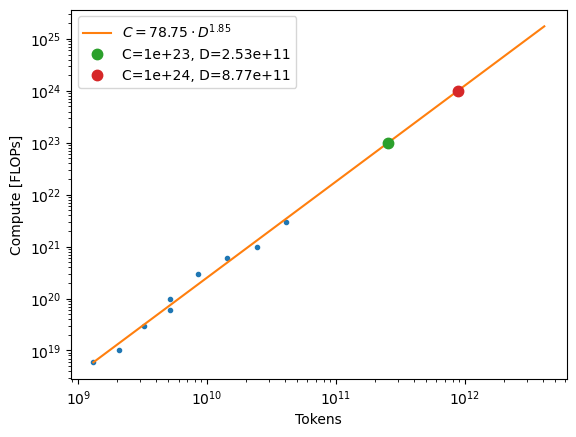

In [22]:
plt.figure()
plt.plot(xdata, ydata, marker='.', linestyle='')
xs = np.linspace(log_xdata[0], log_xdata[-1]+2, 100)
# ys = k*xs**n
ys = m*xs+b

plt.plot(10**xs, 10**ys, label=fr"$C = {k:.2f} \cdot D^{{{n:.2f}}}$")


#what we want to solve for
Cs = np.array([1e23, 1e24])
Ds = (1/k)**(1/n)*Cs**(1/n)

for C in Cs:
    D = (1/k)**(1/n)*C**(1/n)
    plt.plot(D, C, linestyle='', marker='.', markersize=15, label=f"C={C}, D={D:.2e}")


plt.xscale('log')
plt.yscale('log')
plt.xlabel("Tokens")
plt.ylabel("Compute [FLOPs]")
plt.legend()

In [23]:
Cs = np.array([1e13, 3e13, 6e13, 1e14, 3e14, 6e14, 1e15, 3e15, 1e16, 3e16, 6e16, 1e17, 3e17, 6e17, 1e18], dtype=int)

In [24]:
def get_loss(config):
    import requests
    config["api_key"]="ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAILKzrUajvO8cfeJLAhbcVgcmvjc+o1fYkFotBPh5BCtf kaitwang@stanford.edu"
    return requests.get("http://hyperturing.stanford.edu:8000/loss", config).json()

def total_flops_used():
    import requests
    api_key="ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAILKzrUajvO8cfeJLAhbcVgcmvjc+o1fYkFotBPh5BCtf kaitwang@stanford.edu"
    return requests.get("http://hyperturing.stanford.edu:8000/total_flops_used", {"api_key": api_key}).json()

def previous_runs():
    import requests
    api_key="ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAILKzrUajvO8cfeJLAhbcVgcmvjc+o1fYkFotBPh5BCtf kaitwang@stanford.edu"
    return requests.get("http://hyperturing.stanford.edu:8000/previous_runs", {"api_key": api_key}).json()

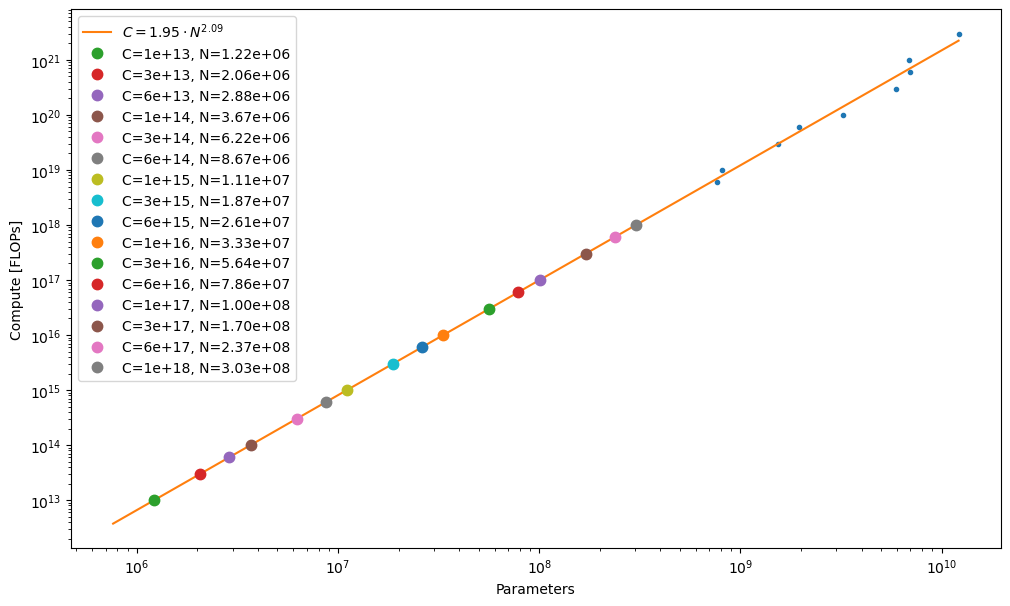

In [104]:
plt.figure(figsize=(12, 7))
plt.plot(xdata, ydata, marker='.', linestyle='')
xs = np.linspace(log_xdata[0]-3, log_xdata[-1], 100)
# ys = k*xs**n
ys = m*xs+b

plt.plot(10**xs, 10**ys, label=fr"$C = {k:.2f} \cdot N^{{{n:.2f}}}$")


#what we want to solve for
Cs = np.array([1e13, 3e13, 6e13, 1e14, 3e14, 6e14, 1e15, 3e15, 6e15, 1e16, 3e16, 6e16, 1e17, 3e17, 6e17, 1e18], dtype=int)
Ns = (1/k)**(1/n)*Cs**(1/n)

for C in Cs:
    N = (1/k)**(1/n)*C**(1/n)
    plt.plot(N, C, linestyle='', marker='.', markersize=15, label=f"C={C:.0e}, N={N:.2e}")


plt.xscale('log')
plt.yscale('log')
plt.xlabel("Parameters")
plt.ylabel("Compute [FLOPs]")
plt.legend()

In [27]:
def get_model_dims(num_parameters, aspect_ratio):
    D = (num_parameters*aspect_ratio/12)**(1/3)
    L = (num_parameters/aspect_ratio**2/12)**(1/3)
    L = max(1, int(L+0.5))
    D = (num_parameters/12/L)**0.5
    D = int(D+0.5)
    return D, L

def in_range(D, L):
    return 64 <= D <= 1024 and 2 <= L <= 24

In [47]:
ds = defaultdict(list) #compute -> list of [{num_params, config, loss}]

In [69]:
aspect_ratio = 16
for compute, num_parameters_base in zip(Cs[:7], Ns[:7]):
    print(f"\nCompute={compute}: sweep from {num_parameters_base/1e2:.0f} to {num_parameters_base*1e2:.0f}...")
    for num_parameters in np.linspace(num_parameters_base/1e3, num_parameters_base/1e1, 6):
        D, L = get_model_dims(num_parameters, aspect_ratio)
        # print(f"num_parameters={num_parameters:.1e}: D={D}, L={L}")
        if not in_range(D, L):
            print(f"num_parameters={num_parameters:.1e}: D={D}, L={L} is out of range")
            continue
        config = {
            "d_model": D,
            "num_layers": L,
            "num_heads": 8,
            "batch_size": 128,
            "learning_rate": 1e-3,
            "train_flops": compute,
        }
        ret = get_loss(config)
        loss, total_flops_used = ret["loss"], ret["total_flops_used"]
        print(f"num_parameters={num_parameters:.1e}: D={D}, L={L}, loss={loss}, aspect_ratio={aspect_ratio}, total_flops_used={total_flops_used:.2e}")
        ds[compute].append({"num_params": num_parameters, "aspect_ratio": aspect_ratio, "config": config, "loss": loss})


Compute=10000000000000: sweep from 12200 to 121998044...
num_parameters=1.2e+03: D=10, L=1 is out of range
num_parameters=2.5e+04: D=33, L=2 is out of range
num_parameters=5.0e+04: D=37, L=3 is out of range
num_parameters=7.4e+04: D=45, L=3 is out of range
num_parameters=9.8e+04: D=52, L=3 is out of range
num_parameters=1.2e+05: D=58, L=3 is out of range

Compute=30000000000000: sweep from 20646 to 206460554...
num_parameters=2.1e+03: D=13, L=1 is out of range
num_parameters=4.3e+04: D=42, L=2 is out of range
num_parameters=8.4e+04: D=48, L=3 is out of range
num_parameters=1.2e+05: D=59, L=3 is out of range
num_parameters=1.7e+05: D=59, L=4 is out of range
num_parameters=2.1e+05: D=66, L=4, loss=10.296197891235352, aspect_ratio=16, total_flops_used=3.88e+16

Compute=60000000000000: sweep from 28774 to 287736250...
num_parameters=2.9e+03: D=15, L=1 is out of range
num_parameters=6.0e+04: D=41, L=3 is out of range
num_parameters=1.2e+05: D=57, L=3 is out of range
num_parameters=1.7e+05:

In [63]:
aspect_ratio = 32
for key, value in ds.items():
    value_sorted = sorted(value, key=lambda x: x["num_params"])
    ds[key] = value_sorted

10000000000000
30000000000000
60000000000000
100000000000000
300000000000000
600000000000000
1000000000000000


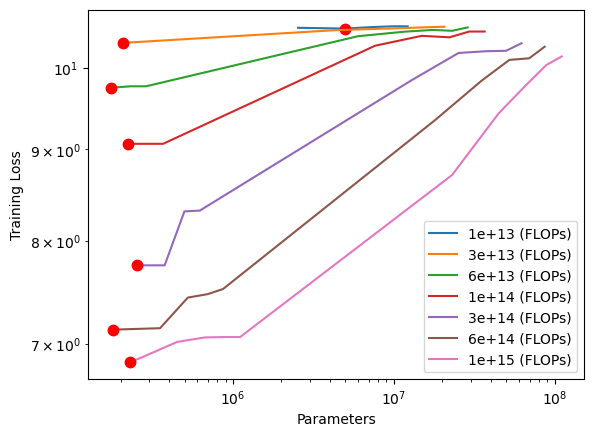

In [67]:
#plot isoflop curves
plt.figure()
aspect_ratio = 64
for i, budget in enumerate(ds.keys()):
    print(budget)
    parameters = [item["num_params"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    losses = [item["loss"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    assert len(parameters) == len(losses)
    if len(parameters) == 0:
        continue
    min_idx = np.argmin(losses)
    
    plt.plot(parameters, losses, label=f"{budget:.0e} (FLOPs)")
    # print(parameters[min_idx], losses[min_idx], ds[budget][min_idx]["config"])
    plt.plot(parameters[min_idx], losses[min_idx], marker=".", markersize=15, color="r")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("Parameters")
    plt.ylabel("Training Loss")

plt.legend()

In [77]:
#ablate lr
#plot isoflop curves
aspect_ratio = 32
for compute in ds.keys():
    parameters = [item["num_params"] for item in ds[compute] if item["aspect_ratio"] == aspect_ratio]
    losses = [item["loss"] for item in ds[compute] if item["aspect_ratio"] == aspect_ratio]
    assert len(parameters) == len(losses)
    if len(parameters) == 0:
        continue
    min_idx = np.argmin(losses)
    config = ds[compute][min_idx]["config"]
    for lr in [1e-3, 1e-4]:
        config = config.copy()
        config["learning_rate"] = lr
        ret = get_loss(config)
        loss, total_flops_used = ret["loss"], ret["total_flops_used"]
        print(f"Compute: {compute:.1e}, num_parameters={parameters[min_idx]:.1e}: D={config["d_model"]}, L={config["num_layers"]}, LR ablated to lr={lr}, loss = {loss:.1f}, aspect_ratio={aspect_ratio}, total_flops_used={total_flops_used:.2e}")
        ds[compute].append({"num_params": num_parameters, "aspect_ratio": aspect_ratio, "config": config, "loss": loss})
    print(f"\n")

Compute: 1.0e+13, num_parameters=1.1e+06: D=350, L=5, LR ablated to lr=0.001, loss = 10.5, aspect_ratio=32, total_flops_used=4.20e+16
Compute: 1.0e+13, num_parameters=1.1e+06: D=350, L=5, LR ablated to lr=0.0001, loss = 10.6, aspect_ratio=32, total_flops_used=4.20e+16


Compute: 3.0e+13, num_parameters=1.1e+06: D=66, L=4, LR ablated to lr=0.001, loss = 10.3, aspect_ratio=32, total_flops_used=4.20e+16
Compute: 3.0e+13, num_parameters=1.1e+06: D=66, L=4, LR ablated to lr=0.0001, loss = 10.5, aspect_ratio=32, total_flops_used=4.20e+16


Compute: 6.0e+13, num_parameters=1.1e+06: D=109, L=2, LR ablated to lr=0.001, loss = 9.8, aspect_ratio=32, total_flops_used=4.20e+16
Compute: 6.0e+13, num_parameters=1.1e+06: D=109, L=2, LR ablated to lr=0.0001, loss = 10.5, aspect_ratio=32, total_flops_used=4.20e+16


Compute: 1.0e+14, num_parameters=1.1e+06: D=70, L=5, LR ablated to lr=0.001, loss = 9.0, aspect_ratio=32, total_flops_used=4.20e+16
Compute: 1.0e+14, num_parameters=1.1e+06: D=70, L=5, LR ab

In [78]:
#ablate batch size
#plot isoflop curves
aspect_ratio = 32
for compute in ds.keys():
    parameters = [item["num_params"] for item in ds[compute] if item["aspect_ratio"] == aspect_ratio]
    losses = [item["loss"] for item in ds[compute] if item["aspect_ratio"] == aspect_ratio]
    assert len(parameters) == len(losses)
    if len(parameters) == 0:
        continue
    min_idx = np.argmin(losses)
    print(f"Compute: {compute:.1e}, min_idx: {min_idx}")
    config = ds[compute][min_idx]["config"]
    for batch_size in [128, 256]:
        config = config.copy()
        config["batch_size"] = batch_size
        ret = get_loss(config)
        loss, total_flops_used = ret["loss"], ret["total_flops_used"]
        print(f"Compute: {compute:.1e}, num_parameters={parameters[min_idx]:.1e}: D={config["d_model"]}, L={config["num_layers"]}, batch_size ablated to {batch_size}, loss = {loss:.1f}, aspect_ratio={aspect_ratio}, total_flops_used={total_flops_used:.2e}")
        ds[compute].append({"num_params": num_parameters, "aspect_ratio": aspect_ratio, "config": config, "loss": loss})
    print(f"\n")

Compute: 1.0e+13, min_idx: 4
Compute: 1.0e+13, num_parameters=1.1e+06: D=350, L=5, batch_size ablated to 128, loss = 10.5, aspect_ratio=32, total_flops_used=4.20e+16
Compute: 1.0e+13, num_parameters=1.1e+06: D=350, L=5, batch_size ablated to 256, loss = 10.5, aspect_ratio=32, total_flops_used=4.20e+16


Compute: 3.0e+13, min_idx: 6
Compute: 3.0e+13, num_parameters=1.1e+06: D=66, L=4, batch_size ablated to 128, loss = 10.3, aspect_ratio=32, total_flops_used=4.20e+16
Compute: 3.0e+13, num_parameters=1.1e+06: D=66, L=4, batch_size ablated to 256, loss = 10.5, aspect_ratio=32, total_flops_used=4.20e+16


Compute: 6.0e+13, min_idx: 8
Compute: 6.0e+13, num_parameters=1.1e+06: D=109, L=2, batch_size ablated to 128, loss = 9.8, aspect_ratio=32, total_flops_used=4.20e+16
Compute: 6.0e+13, num_parameters=1.1e+06: D=109, L=2, batch_size ablated to 256, loss = 10.3, aspect_ratio=32, total_flops_used=4.20e+16


Compute: 1.0e+14, min_idx: 8
Compute: 1.0e+14, num_parameters=1.1e+06: D=70, L=5, batch_

In [80]:
#ablate num_heads
#plot isoflop curves
aspect_ratio = 32
for compute in ds.keys():
    parameters = [item["num_params"] for item in ds[compute] if item["aspect_ratio"] == aspect_ratio]
    losses = [item["loss"] for item in ds[compute] if item["aspect_ratio"] == aspect_ratio]
    assert len(parameters) == len(losses)
    if len(parameters) == 0:
        continue
    min_idx = np.argmin(losses)
    print(f"Compute: {compute:.1e}, min_idx: {min_idx}")
    config = ds[compute][min_idx]["config"]
    for num_heads in [2, 4, 8, 16]:
        config = config.copy()
        config["num_heads"] = num_heads
        ret = get_loss(config)
        loss, total_flops_used = ret["loss"], ret["total_flops_used"]
        print(f"Compute: {compute:.1e}, num_parameters={parameters[min_idx]:.1e}: D={config["d_model"]}, L={config["num_layers"]}, num_heads ablated to {num_heads}, loss = {loss:.5f}, aspect_ratio={aspect_ratio}, total_flops_used={total_flops_used:.2e}")
        ds[compute].append({"num_params": num_parameters, "aspect_ratio": aspect_ratio, "config": config, "loss": loss})
    print(f"\n")

Compute: 1.0e+13, min_idx: 4
Compute: 1.0e+13, num_parameters=1.1e+06: D=350, L=5, num_heads ablated to 2, loss = 10.53679, aspect_ratio=32, total_flops_used=5.04e+16
Compute: 1.0e+13, num_parameters=1.1e+06: D=350, L=5, num_heads ablated to 4, loss = 10.53692, aspect_ratio=32, total_flops_used=5.04e+16
Compute: 1.0e+13, num_parameters=1.1e+06: D=350, L=5, num_heads ablated to 8, loss = 10.53676, aspect_ratio=32, total_flops_used=5.04e+16
Compute: 1.0e+13, num_parameters=1.1e+06: D=350, L=5, num_heads ablated to 16, loss = 10.53736, aspect_ratio=32, total_flops_used=5.04e+16


Compute: 3.0e+13, min_idx: 6
Compute: 3.0e+13, num_parameters=1.1e+06: D=66, L=4, num_heads ablated to 2, loss = 10.29433, aspect_ratio=32, total_flops_used=5.04e+16
Compute: 3.0e+13, num_parameters=1.1e+06: D=66, L=4, num_heads ablated to 4, loss = 10.29513, aspect_ratio=32, total_flops_used=5.04e+16
Compute: 3.0e+13, num_parameters=1.1e+06: D=66, L=4, num_heads ablated to 8, loss = 10.29620, aspect_ratio=32, to

In [88]:
#ablate aspect ratio
#plot isoflop curves
for compute in ds.keys():
    aspect_ratio = 32
    parameters = [item["num_params"] for item in ds[compute] if item["aspect_ratio"] == aspect_ratio]
    losses = [item["loss"] for item in ds[compute] if item["aspect_ratio"] == aspect_ratio]
    assert len(parameters) == len(losses)
    if len(parameters) == 0:
        continue
    min_idx = np.argmin(losses)
    print(f"Compute: {compute:.1e}, min_idx: {min_idx}")
    config = ds[compute][min_idx]["config"]
    for aspect_ratio in [4, 8, 16, 32, 64, 128]:
        config = config.copy()
        D, L = get_model_dims(parameters[min_idx], aspect_ratio)
        if not in_range(D, L):
            print(f"Compute: {compute:.1e}, num_parameters={parameters[min_idx]:.1e}: D={D}, L={L} is out of range")
            continue
        config["d_model"] = D
        config["num_layers"] = L
        ret = get_loss(config)
        loss, total_flops_used = ret["loss"], ret["total_flops_used"]
        print(f"Compute: {compute:.1e}, num_parameters={parameters[min_idx]:.1e}: D={config["d_model"]}, L={config["num_layers"]}, aspect_ratio ablated to {aspect_ratio}, loss = {loss:.5f}, aspect_ratio={aspect_ratio}, total_flops_used={total_flops_used:.2e}")
        ds[compute].append({"num_params": num_parameters, "aspect_ratio": aspect_ratio, "config": config, "loss": loss})
    print(f"\n")

Compute: 1.0e+13, min_idx: 4
Compute: 1.0e+13, num_parameters=1.1e+06: D=72, L=18, aspect_ratio ablated to 4, loss = 10.54494, aspect_ratio=4, total_flops_used=5.79e+16
Compute: 1.0e+13, num_parameters=1.1e+06: D=92, L=11, aspect_ratio ablated to 8, loss = 10.51612, aspect_ratio=8, total_flops_used=5.79e+16
Compute: 1.0e+13, num_parameters=1.1e+06: D=115, L=7, aspect_ratio ablated to 16, loss = 10.51423, aspect_ratio=16, total_flops_used=5.79e+16
Compute: 1.0e+13, num_parameters=1.1e+06: D=152, L=4, aspect_ratio ablated to 32, loss = 10.53956, aspect_ratio=32, total_flops_used=5.79e+16
Compute: 1.0e+13, num_parameters=1.1e+06: D=175, L=3, aspect_ratio ablated to 64, loss = 10.56819, aspect_ratio=64, total_flops_used=5.79e+16
Compute: 1.0e+13, num_parameters=1.1e+06: D=215, L=2, aspect_ratio ablated to 128, loss = 10.56819, aspect_ratio=128, total_flops_used=5.79e+16


Compute: 3.0e+13, min_idx: 6
Compute: 3.0e+13, num_parameters=1.1e+06: D=72, L=18, aspect_ratio ablated to 4, loss = 10

In [89]:
aspect_ratio = 8
for key, value in ds.items():
    value_sorted = sorted(value, key=lambda x: x["num_params"])
    ds[key] = value_sorted

In [91]:
aspect_ratio = 8
for compute, num_parameters_base in zip(Cs[:6], Ns[:6]):
    print(f"\nCompute={compute}: sweep from {num_parameters_base/1e2:.0f} to {num_parameters_base*1e2:.0f}...")
    for num_parameters in np.linspace(num_parameters_base/1e4, num_parameters_base*1e1, 10):
        D, L = get_model_dims(num_parameters, aspect_ratio)
        # print(f"num_parameters={num_parameters:.1e}: D={D}, L={L}")
        if not in_range(D, L):
            print(f"num_parameters={num_parameters:.1e}: D={D}, L={L} is out of range")
            continue
        config = {
            "d_model": D,
            "num_layers": L,
            "num_heads": 8,
            "batch_size": 128,
            "learning_rate": 1e-3,
            "train_flops": compute,
        }
        ret = get_loss(config)
        loss, total_flops_used = ret["loss"], ret["total_flops_used"]
        print(f"num_parameters={num_parameters:.1e}: D={D}, L={L}, loss={loss}, aspect_ratio={aspect_ratio}, total_flops_used={total_flops_used:.2e}")
        ds[compute].append({"num_params": num_parameters, "aspect_ratio": aspect_ratio, "config": config, "loss": loss})


Compute=10000000000000: sweep from 12200 to 121998044...
num_parameters=1.2e+02: D=3, L=1 is out of range
num_parameters=1.4e+06: D=97, L=12, loss=10.524190902709961, aspect_ratio=8, total_flops_used=6.00e+16
num_parameters=2.7e+06: D=123, L=15, loss=10.515217781066895, aspect_ratio=8, total_flops_used=6.00e+16
num_parameters=4.1e+06: D=141, L=17, loss=10.538368225097656, aspect_ratio=8, total_flops_used=6.00e+16
num_parameters=5.4e+06: D=154, L=19, loss=10.5392427444458, aspect_ratio=8, total_flops_used=6.00e+16
num_parameters=6.8e+06: D=164, L=21, loss=10.559986114501953, aspect_ratio=8, total_flops_used=6.00e+16
num_parameters=8.1e+06: D=176, L=22, loss=10.559986114501953, aspect_ratio=8, total_flops_used=6.00e+16
num_parameters=9.5e+06: D=185, L=23, loss=10.561017990112305, aspect_ratio=8, total_flops_used=6.00e+16
num_parameters=1.1e+07: D=194, L=24, loss=10.570899963378906, aspect_ratio=8, total_flops_used=6.00e+16
num_parameters=1.2e+07: D=202, L=25 is out of range

Compute=300

In [92]:
aspect_ratio = 16
for compute, num_parameters_base in zip(Cs[:6], Ns[:6]):
    print(f"\nCompute={compute}: sweep from {num_parameters_base/1e2:.0f} to {num_parameters_base*1e2:.0f}...")
    for num_parameters in np.linspace(num_parameters_base/1e4, num_parameters_base*1e1, 10):
        D, L = get_model_dims(num_parameters, aspect_ratio)
        # print(f"num_parameters={num_parameters:.1e}: D={D}, L={L}")
        if not in_range(D, L):
            print(f"num_parameters={num_parameters:.1e}: D={D}, L={L} is out of range")
            continue
        config = {
            "d_model": D,
            "num_layers": L,
            "num_heads": 8,
            "batch_size": 128,
            "learning_rate": 1e-3,
            "train_flops": compute,
        }
        ret = get_loss(config)
        loss, total_flops_used = ret["loss"], ret["total_flops_used"]
        print(f"num_parameters={num_parameters:.1e}: D={D}, L={L}, loss={loss}, aspect_ratio={aspect_ratio}, total_flops_used={total_flops_used:.2e}")
        ds[compute].append({"num_params": num_parameters, "aspect_ratio": aspect_ratio, "config": config, "loss": loss})


Compute=10000000000000: sweep from 12200 to 121998044...
num_parameters=1.2e+02: D=3, L=1 is out of range
num_parameters=1.4e+06: D=119, L=8, loss=10.496885299682617, aspect_ratio=16, total_flops_used=6.14e+16
num_parameters=2.7e+06: D=150, L=10, loss=10.51595687866211, aspect_ratio=16, total_flops_used=6.14e+16
num_parameters=4.1e+06: D=176, L=11, loss=10.5209379196167, aspect_ratio=16, total_flops_used=6.15e+16
num_parameters=5.4e+06: D=194, L=12, loss=10.5392427444458, aspect_ratio=16, total_flops_used=6.15e+16
num_parameters=6.8e+06: D=208, L=13, loss=10.559986114501953, aspect_ratio=16, total_flops_used=6.15e+16
num_parameters=8.1e+06: D=220, L=14, loss=10.559986114501953, aspect_ratio=16, total_flops_used=6.15e+16
num_parameters=9.5e+06: D=230, L=15, loss=10.561017990112305, aspect_ratio=16, total_flops_used=6.15e+16
num_parameters=1.1e+07: D=245, L=15, loss=10.561017990112305, aspect_ratio=16, total_flops_used=6.15e+16
num_parameters=1.2e+07: D=252, L=16, loss=10.56101799011230

In [103]:
Cs

array([     10000000000000,      30000000000000,      60000000000000,
           100000000000000,     300000000000000,     600000000000000,
          1000000000000000,    3000000000000000,   10000000000000000,
         30000000000000000,   60000000000000000,  100000000000000000,
        300000000000000000,  600000000000000000, 1000000000000000000])

In [102]:
aspect_ratio = 32
for compute, num_parameters_base in zip(Cs[8:9], Ns[8:9]):
    print(f"\nCompute={compute:.1e}: sweep from {num_parameters_base/1e2:.0f} to {num_parameters_base*1e2:.0f}...")
    num_parameters_base = np.log10(num_parameters_base)
    for num_parameters in np.linspace(num_parameters_base-4, num_parameters_base+2, num=10):
        num_parameters = 10**num_parameters
        # print(num_parameters_base)
        # print(num_parameters)
        D, L = get_model_dims(num_parameters, aspect_ratio)
        # print(f"num_parameters={num_parameters:.1e}: D={D}, L={L}")
        if not in_range(D, L):
            print(f"num_parameters={num_parameters:.1e}: D={D}, L={L} is out of range")
            continue
        config = {
            "d_model": D,
            "num_layers": L,
            "num_heads": 8,
            "batch_size": 128,
            "learning_rate": 1e-3,
            "train_flops": compute,
        }
        ret = get_loss(config)
        loss, total_flops_used = ret["loss"], ret["total_flops_used"]
        print(f"num_parameters={num_parameters:.1e}: D={D}, L={L}, loss={loss}, aspect_ratio={aspect_ratio}, total_flops_used={total_flops_used:.2e}")
        ds[compute].append({"num_params": num_parameters, "aspect_ratio": aspect_ratio, "config": config, "loss": loss})


Compute=1.0e+16: sweep from 333423 to 3334228289...
num_parameters=3.3e+03: D=17, L=1 is out of range
num_parameters=1.5e+04: D=36, L=1 is out of range
num_parameters=7.2e+04: D=55, L=2 is out of range
num_parameters=3.3e+05: D=96, L=3, loss=5.673192024230957, aspect_ratio=32, total_flops_used=1.17e+17
num_parameters=1.5e+06: D=161, L=5, loss=5.554914474487305, aspect_ratio=32, total_flops_used=1.17e+17
num_parameters=7.2e+06: D=274, L=8, loss=5.566752910614014, aspect_ratio=32, total_flops_used=1.17e+17
num_parameters=3.3e+07: D=445, L=14, loss=5.974851608276367, aspect_ratio=32, total_flops_used=1.17e+17
num_parameters=1.5e+08: D=749, L=23, loss=7.9094696044921875, aspect_ratio=32, total_flops_used=1.17e+17
num_parameters=7.2e+08: D=1239, L=39 is out of range
num_parameters=3.3e+09: D=2068, L=65 is out of range


In [109]:
aspect_ratio = 32
for compute, num_parameters_base in zip(Cs[8:9], Ns[8:9]):
    print(f"\nCompute={compute:.1e}: sweep from {num_parameters_base/1e2:.0f} to {num_parameters_base*1e2:.0f}...")
    num_parameters_base = np.log10(num_parameters_base)
    for num_parameters in np.linspace(num_parameters_base-2, num_parameters_base-1, num=6):
        num_parameters = 10**num_parameters
        # print(num_parameters_base)
        # print(num_parameters)
        D, L = get_model_dims(num_parameters, aspect_ratio)
        # print(f"num_parameters={num_parameters:.1e}: D={D}, L={L}")
        if not in_range(D, L):
            print(f"num_parameters={num_parameters:.1e}: D={D}, L={L} is out of range")
            continue
        config = {
            "d_model": D,
            "num_layers": L,
            "num_heads": 8,
            "batch_size": 128,
            "learning_rate": 1e-3,
            "train_flops": compute,
        }
        ret = get_loss(config)
        loss, total_flops_used = ret["loss"], ret["total_flops_used"]
        print(f"num_parameters={num_parameters:.1e}: D={D}, L={L}, loss={loss}, aspect_ratio={aspect_ratio}, total_flops_used={total_flops_used:.2e}")
        ds[compute].append({"num_params": num_parameters, "aspect_ratio": aspect_ratio, "config": config, "loss": loss})


Compute=6.0e+15: sweep from 261070 to 2610695500...
num_parameters=2.6e+05: D=85, L=3, loss=5.838054180145264, aspect_ratio=32, total_flops_used=1.75e+17
num_parameters=4.1e+05: D=107, L=3, loss=5.81991720199585, aspect_ratio=32, total_flops_used=1.81e+17
num_parameters=6.6e+05: D=117, L=4, loss=5.76420783996582, aspect_ratio=32, total_flops_used=1.87e+17
num_parameters=1.0e+06: D=147, L=4, loss=5.790034294128418, aspect_ratio=32, total_flops_used=1.93e+17
num_parameters=1.6e+06: D=166, L=5, loss=5.795224666595459, aspect_ratio=32, total_flops_used=1.99e+17
num_parameters=2.6e+06: D=190, L=6, loss=5.766134262084961, aspect_ratio=32, total_flops_used=2.05e+17


In [ ]:
aspect_ratio = 32
for compute, num_parameters_base in zip(Cs[10:11], Ns[10:11]):
    print(f"\nCompute={compute:.1e}: sweep from {num_parameters_base/1e2:.0f} to {num_parameters_base*1e2:.0f}...")
    num_parameters_base = np.log10(num_parameters_base)
    for num_parameters in np.linspace(num_parameters_base-2, num_parameters_base-1, num=6):
        num_parameters = 10**num_parameters
        # print(num_parameters_base)
        # print(num_parameters)
        D, L = get_model_dims(num_parameters, aspect_ratio)
        # print(f"num_parameters={num_parameters:.1e}: D={D}, L={L}")
        if not in_range(D, L):
            print(f"num_parameters={num_parameters:.1e}: D={D}, L={L} is out of range")
            continue
        config = {
            "d_model": D,
            "num_layers": L,
            "num_heads": 8,
            "batch_size": 128,
            "learning_rate": 1e-3,
            "train_flops": compute,
        }
        ret = get_loss(config)
        loss, total_flops_used = ret["loss"], ret["total_flops_used"]
        print(f"num_parameters={num_parameters:.1e}: D={D}, L={L}, loss={loss}, aspect_ratio={aspect_ratio}, total_flops_used={total_flops_used:.2e}")
        ds[compute].append({"num_params": num_parameters, "aspect_ratio": aspect_ratio, "config": config, "loss": loss})

In [123]:
aspect_ratio = 32
for key, value in ds.items():
    value_sorted = sorted(value, key=lambda x: x["num_params"])
    ds[key] = value_sorted

10000000000000
30000000000000
60000000000000
100000000000000
300000000000000
600000000000000
1000000000000000
10000000000000000
3000000000000000
6000000000000000


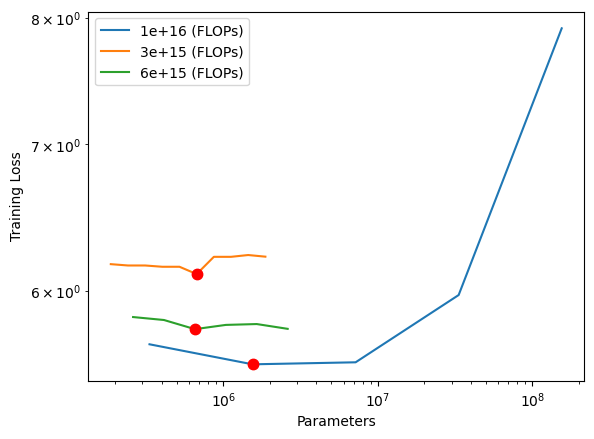

In [118]:
#plot isoflop curves
plt.figure()
aspect_ratio = 32
for i, budget in enumerate(ds.keys()):
    print(budget)
    if budget < 3e15:
        continue
    parameters = [item["num_params"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    losses = [item["loss"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    assert len(parameters) == len(losses)
    if len(parameters) == 0:
        continue
    min_idx = np.argmin(losses)
    
    plt.plot(parameters, losses, label=f"{budget:.0e} (FLOPs)")
    # print(parameters[min_idx], losses[min_idx], ds[budget][min_idx]["config"])
    plt.plot(parameters[min_idx], losses[min_idx], marker=".", markersize=15, color="r")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("Parameters")
    plt.ylabel("Training Loss")

plt.legend()

In [125]:
aspect_ratio = 32
for compute, num_parameters_base in zip(Cs[13:14], Ns[13:14]):
    print(f"\nCompute={compute:.1e}: sweep from {num_parameters_base/1e2:.0f} to {num_parameters_base*1e2:.0f}...")
    num_parameters_base = np.log10(num_parameters_base)
    for num_parameters in np.linspace(num_parameters_base-1.5, num_parameters_base, num=3):
        num_parameters = 10**num_parameters
        # print(num_parameters_base)
        # print(num_parameters)
        D, L = get_model_dims(num_parameters, aspect_ratio)
        # print(f"num_parameters={num_parameters:.1e}: D={D}, L={L}")
        if not in_range(D, L):
            print(f"num_parameters={num_parameters:.1e}: D={D}, L={L} is out of range")
            continue
        config = {
            "d_model": D,
            "num_layers": L,
            "num_heads": 8,
            "batch_size": 128,
            "learning_rate": 1e-3,
            "train_flops": compute,
        }
        ret = get_loss(config)
        loss, total_flops_used = ret["loss"], ret["total_flops_used"]
        print(f"num_parameters={num_parameters:.1e}: D={D}, L={L}, loss={loss}, aspect_ratio={aspect_ratio}, total_flops_used={total_flops_used:.2e}")
        ds[compute].append({"num_params": num_parameters, "aspect_ratio": aspect_ratio, "config": config, "loss": loss})


Compute=3.0e+17: sweep from 1699653 to 16996534140...
num_parameters=5.4e+06: D=237, L=8, loss=4.032639980316162, aspect_ratio=32, total_flops_used=1.33e+18
num_parameters=3.0e+07: D=440, L=13, loss=3.798600673675537, aspect_ratio=32, total_flops_used=1.63e+18
num_parameters=1.7e+08: D=768, L=24, loss=4.19678626656391, aspect_ratio=32, total_flops_used=1.93e+18


10000000000000
30000000000000
60000000000000
100000000000000
300000000000000
600000000000000
1000000000000000
10000000000000000
3000000000000000
6000000000000000
30000000000000000
60000000000000000
100000000000000000
300000000000000000


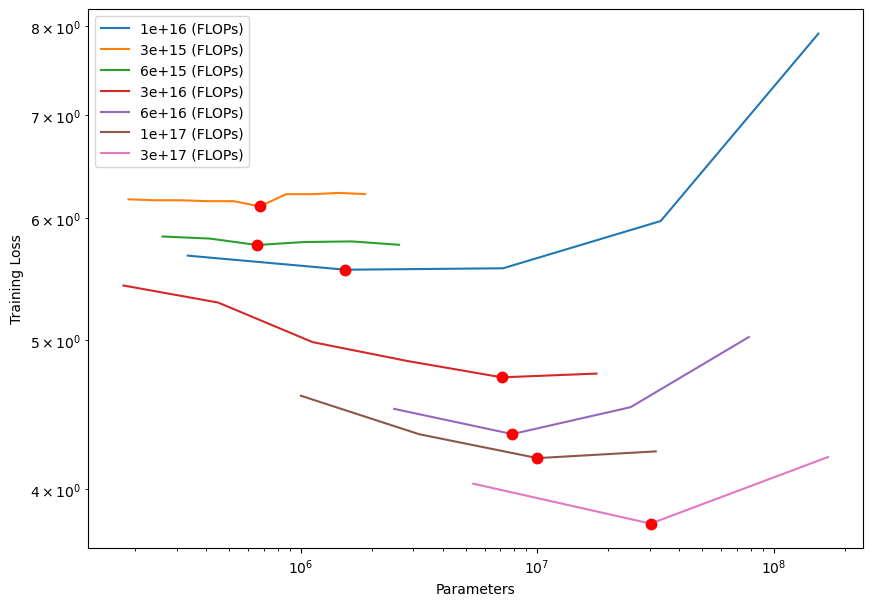

In [128]:
#plot isoflop curves
plt.figure(figsize=(10,7))
aspect_ratio = 32
for i, budget in enumerate(ds.keys()):
    print(budget)
    if budget < 3e15:
        continue
    parameters = [item["num_params"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    losses = [item["loss"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    assert len(parameters) == len(losses)
    if len(parameters) == 0:
        continue
    min_idx = np.argmin(losses)
    
    plt.plot(parameters, losses, label=f"{budget:.0e} (FLOPs)")
    # print(parameters[min_idx], losses[min_idx], ds[budget][min_idx]["config"])
    plt.plot(parameters[min_idx], losses[min_idx], marker=".", markersize=15, color="r")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("Parameters")
    plt.ylabel("Training Loss")

plt.legend()

In [137]:
def fit(xdata, ydata): #x and y data are Ns, loss's/Cs (not log)
    log_xdata, log_ydata = np.log10(xdata), np.log10(ydata)
    def f(x, m, b):
        return m*x+b
    m, b = curve_fit(f, log_xdata, log_ydata)[0]
    k, n = 10**b, m
    print(m, b, k, n)
    return m, b, k, n

10000000000000
30000000000000
60000000000000
100000000000000
300000000000000
600000000000000
1000000000000000
10000000000000000
3000000000000000
6000000000000000
30000000000000000
60000000000000000
100000000000000000
300000000000000000
-0.12022700523276886 1.4776867068888562 30.039085491234808 -0.12022700523276886
10000000000000
30000000000000
60000000000000
100000000000000
300000000000000
600000000000000
1000000000000000
10000000000000000
3000000000000000
6000000000000000
30000000000000000
60000000000000000
100000000000000000
300000000000000000


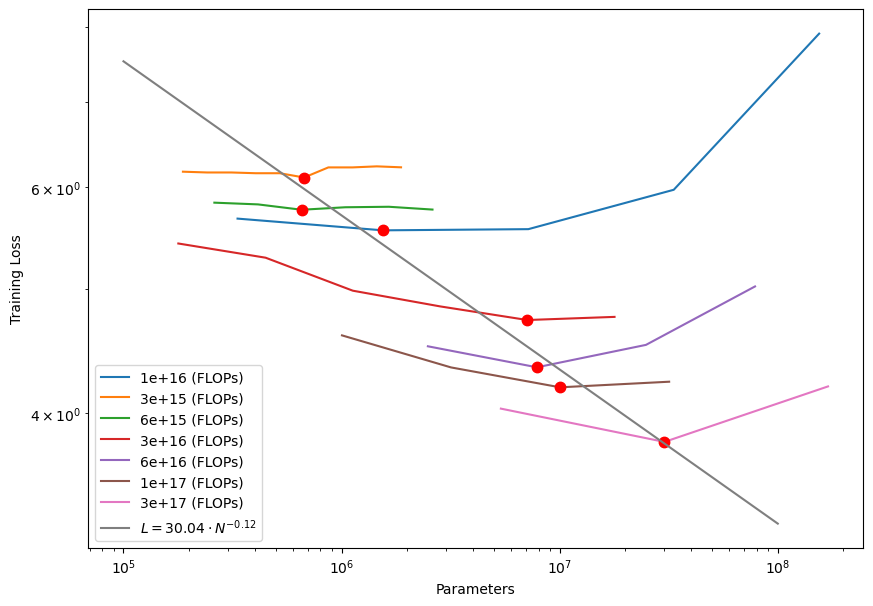

In [141]:
xdata = []
ydata = []

aspect_ratio = 32
for i, budget in enumerate(ds.keys()):
    print(budget)
    if budget < 3e15:
        continue
    parameters = [item["num_params"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    losses = [item["loss"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    assert len(parameters) == len(losses)
    if len(parameters) == 0:
        continue
    min_idx = np.argmin(losses)

    xdata.append(parameters[min_idx])
    ydata.append(losses[min_idx])

m, b, k, n = fit(xdata, ydata)

#plot isoflop curves
plt.figure(figsize=(10,7))
aspect_ratio = 32
for i, budget in enumerate(ds.keys()):
    print(budget)
    if budget < 3e15:
        continue
    parameters = [item["num_params"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    losses = [item["loss"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    assert len(parameters) == len(losses)
    if len(parameters) == 0:
        continue
    min_idx = np.argmin(losses)
    
    plt.plot(parameters, losses, label=f"{budget:.0e} (FLOPs)")
    # print(parameters[min_idx], losses[min_idx], ds[budget][min_idx]["config"])
    plt.plot(parameters[min_idx], losses[min_idx], marker=".", markersize=15, color="r")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("Parameters")
    plt.ylabel("Training Loss")

xs = np.linspace(5, 8, 1000)
ys = m*xs+b
plt.plot(10**xs, 10**ys, label=fr"$L = {k:.2f} \cdot N^{{{n:.2f}}}$")

plt.legend()

10000000000000
30000000000000
60000000000000
100000000000000
300000000000000
600000000000000
1000000000000000
10000000000000000
3000000000000000
6000000000000000
30000000000000000
60000000000000000
100000000000000000
300000000000000000
0.8776253498635597 -7.836023602370996 1.4587349810276904e-08 0.8776253498635597
10000000000000
30000000000000
60000000000000
100000000000000
300000000000000
600000000000000
1000000000000000
10000000000000000
3000000000000000
6000000000000000
30000000000000000
60000000000000000
100000000000000000
300000000000000000


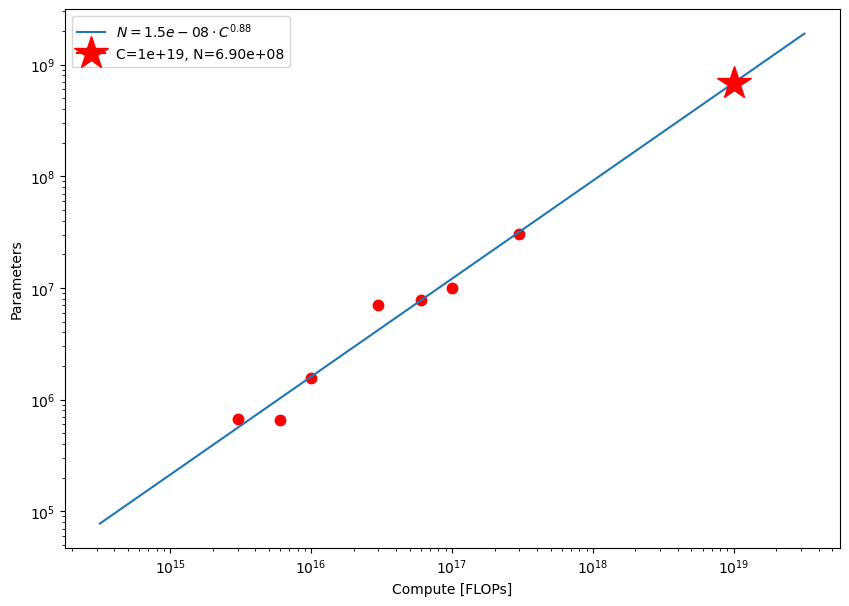

In [158]:
xdata = []
ydata = []

aspect_ratio = 32
for i, budget in enumerate(ds.keys()):
    print(budget)
    if budget < 3e15:
        continue
    parameters = [item["num_params"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    losses = [item["loss"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    assert len(parameters) == len(losses)
    if len(parameters) == 0:
        continue
    min_idx = np.argmin(losses)

    xdata.append(budget)
    ydata.append(parameters[min_idx])

m, b, k, n = fit(xdata, ydata)

#plot isoflop curves
plt.figure(figsize=(10,7))
aspect_ratio = 32
for i, budget in enumerate(ds.keys()):
    print(budget)
    if budget < 3e15:
        continue
    parameters = [item["num_params"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    losses = [item["loss"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    assert len(parameters) == len(losses)
    if len(parameters) == 0:
        continue
    min_idx = np.argmin(losses)
    
    # plt.plot(parameters, losses, label=f"{budget:.0e} (FLOPs)")
    # print(parameters[min_idx], losses[min_idx], ds[budget][min_idx]["config"])
    plt.plot(budget, parameters[min_idx], marker=".", markersize=15, color="r")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("Compute [FLOPs]")
    plt.ylabel("Parameters")

xs = np.linspace(14.5, 19.5, 1000)
ys = m*xs+b
plt.plot(10**xs, 10**ys, label=fr"$N = {k:.1e} \cdot C^{{{n:.2f}}}$")

xp = 19
yp = m*xp+b
plt.plot(10**xp, 10**yp, label=f"C={10**xp:.0e}, N={10**yp:.2e}", marker="*", markersize=25, color="r")

plt.legend()

10000000000000
30000000000000
60000000000000
100000000000000
300000000000000
600000000000000
1000000000000000
10000000000000000
3000000000000000
6000000000000000
30000000000000000
60000000000000000
100000000000000000
300000000000000000
-0.12022700523276886 1.4776867068888562 30.039085491234808 -0.12022700523276886
10000000000000
30000000000000
60000000000000
100000000000000
300000000000000
600000000000000
1000000000000000
10000000000000000
3000000000000000
6000000000000000
30000000000000000
60000000000000000
100000000000000000
300000000000000000


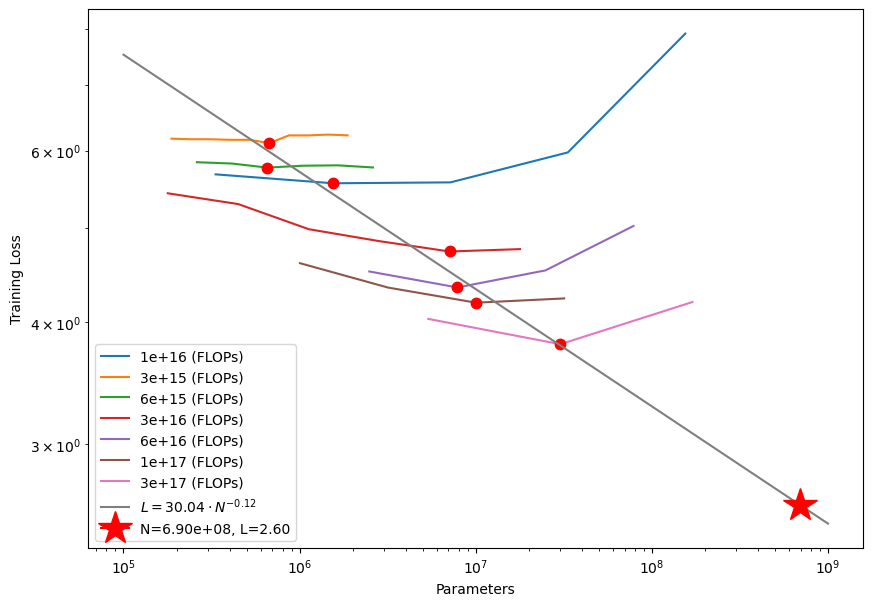

In [161]:
xdata = []
ydata = []

aspect_ratio = 32
for i, budget in enumerate(ds.keys()):
    print(budget)
    if budget < 3e15:
        continue
    parameters = [item["num_params"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    losses = [item["loss"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    assert len(parameters) == len(losses)
    if len(parameters) == 0:
        continue
    min_idx = np.argmin(losses)

    xdata.append(parameters[min_idx])
    ydata.append(losses[min_idx])

m, b, k, n = fit(xdata, ydata)

#plot isoflop curves
plt.figure(figsize=(10,7))
aspect_ratio = 32
for i, budget in enumerate(ds.keys()):
    print(budget)
    if budget < 3e15:
        continue
    parameters = [item["num_params"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    losses = [item["loss"] for item in ds[budget] if item["aspect_ratio"] == aspect_ratio]
    assert len(parameters) == len(losses)
    if len(parameters) == 0:
        continue
    min_idx = np.argmin(losses)
    
    plt.plot(parameters, losses, label=f"{budget:.0e} (FLOPs)")
    # print(parameters[min_idx], losses[min_idx], ds[budget][min_idx]["config"])
    plt.plot(parameters[min_idx], losses[min_idx], marker=".", markersize=15, color="r")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("Parameters")
    plt.ylabel("Training Loss")

xs = np.linspace(5, 9, 1000)
ys = m*xs+b
plt.plot(10**xs, 10**ys, label=fr"$L = {k:.2f} \cdot N^{{{n:.2f}}}$")

xp = 6.90e8
yp = m*np.log10(xp)+b
yp = 10**yp
plt.plot(xp, yp, label=f"N={xp:.2e}, L={yp:.2f}", marker="*", markersize=25, color="r")

plt.legend()

In [134]:
fit(xdata, ydata)

-0.12022700523276886 1.4776867068888562 30.039085491234808 -0.12022700523276886


In [ ]:
get_model_dims(6.90e8, 32)